Data Source : https://www.kaggle.com/datasets/toramky/automobile-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MSIB/07. Regression/Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data.shape

(205, 26)

In [ ]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
data.isin(['?']).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
data['normalized-losses'] = data['normalized-losses'].replace('?',0)
data['normalized-losses'] = data['normalized-losses'].astype('int')
data['normalized-losses'].unique()

array([  0, 164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137,
       101,  78, 106,  85, 107, 104, 113, 150, 129, 115,  93, 142, 161,
       153, 125, 128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186,
        83, 102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95])

In [ ]:
data['num-of-doors'] = data['num-of-doors'].replace('?','four')
data['num-of-doors'] = data['num-of-doors'].replace('four',4)
data['num-of-doors'] = data['num-of-doors'].replace('two',2)
data['num-of-doors'].unique()

array([2, 4])

In [ ]:
data['bore'] = data['bore'].replace('?',0)
data['bore'] = data['bore'].astype('float')
data['bore'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, 0.  , 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [ ]:
data['stroke'] = data['stroke'].replace('?',0)
data['stroke'] = data['stroke'].astype('float')
data['stroke'].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 0.  , 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [ ]:
data['horsepower'] = data['horsepower'].replace('?',0)
data['horsepower'] = data['horsepower'].astype('int')
data['horsepower'] = data['horsepower'].replace(0,int(data['horsepower'].mean()))
data['horsepower'].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288, 103,  73,  82,  94,  62,  56, 112,  92,
       161, 156,  52,  85, 114, 162, 134, 106])

In [ ]:
data['peak-rpm'] = data['peak-rpm'].replace('?',0)
data['peak-rpm'] = data['peak-rpm'].astype('int')
data['peak-rpm'] = data['peak-rpm'].replace(0,data['peak-rpm'].mean())
data['peak-rpm'] = data['peak-rpm'].astype('int')
data['peak-rpm'].unique()

array([5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200,
       4350, 4500, 5200, 4150, 5600, 5900, 5750, 5075, 5250, 4900, 4400,
       6600, 5300])

In [ ]:
data['price'] = data['price'].replace('?',0)
data['price'] = data['price'].astype('int')
data['price'] = data['price'].replace(0,data['price'].mean())
data['price'] = data['price'].astype('int')
data['price'].unique()

array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 12949,
       16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,
        6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,
        8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,  7895,
        9095,  8845, 10295, 12945, 10345,  6785, 11048, 32250, 35550,
       36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845, 13645,
       15645,  8495, 10595, 10245, 10795, 11245, 18280, 18344, 25552,
       28248, 28176, 31600, 34184, 35056, 40960, 45400, 16503,  5389,
        6189,  6669,  7689,  9959,  8499, 12629, 14869, 14489,  6989,
        8189,  9279,  5499,  7099,  6649,  6849,  7349,  7299,  7799,
        7499,  7999,  8249,  8949,  9549, 13499, 14399, 17199, 19699,
       18399, 11900, 13200, 12440, 13860, 15580, 16900, 16695, 17075,
       16630, 17950, 18150, 12764, 22018, 32528, 34028, 37028,  9295,
        9895, 11850, 12170, 15040, 15510, 18620,  5118,  7053,  7603,
        7126,  7775,

In [ ]:
data.isin(['?']).sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
data['num-of-cylinders'] = data['num-of-cylinders'].map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})

Univariate Analysis

In [ ]:
data.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.264780,3.191902,10.142537,104.243902,5124.878049,25.219512,30.751220,13202.092683
std,1.245307,58.282073,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.535268,0.549625,3.972040,39.519405,477.004912,6.542142,6.886443,7868.849609
min,-2.000000,0.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,0.000000,0.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,77.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.130000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,103.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data['price'].mode()

0    12949
dtype: int64

In [ ]:
data.price.sort_values(ascending=False)[:10]

74     45400
16     41315
73     40960
128    37028
17     36880
49     36000
48     35550
72     35056
71     34184
127    34028
Name: price, dtype: int64

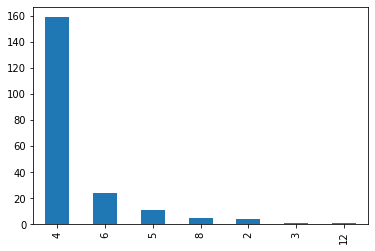

In [ ]:
data['num-of-cylinders'].value_counts().plot(kind='bar')

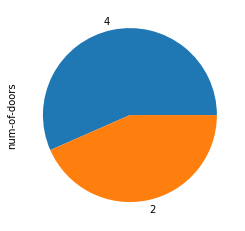

In [ ]:
data['num-of-doors'].value_counts().plot(kind='pie')

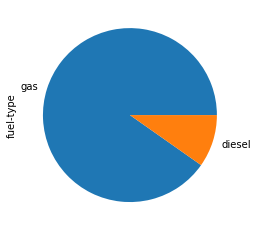

In [ ]:
data['fuel-type'].value_counts().plot(kind='pie')

Bivariate Analysis

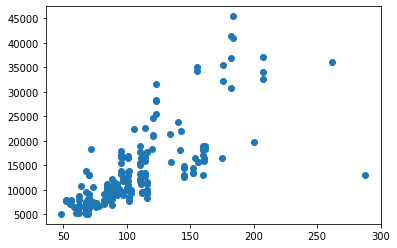

In [ ]:
plt.scatter(data['horsepower'],data['price'])

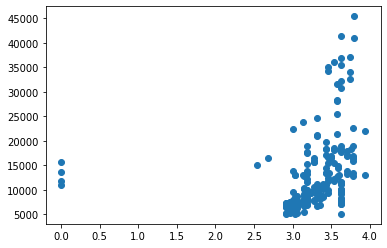

In [ ]:
plt.scatter(data['bore'],data['price'])

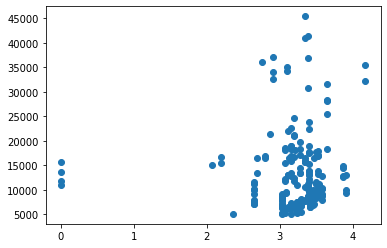

In [ ]:
plt.scatter(data['stroke'],data['price'])

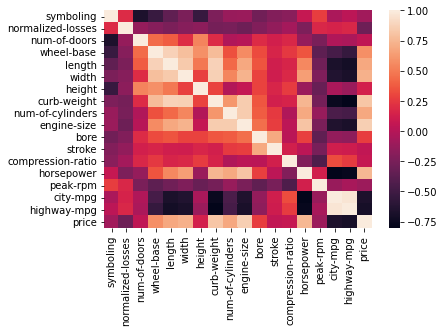

In [ ]:
sns.heatmap(data.corr())

Multivariate Analysis

In [ ]:
px.scatter(data,y='price',x='horsepower',color='make')

In [ ]:
temp = data[['fuel-type','body-style']]
t = temp.groupby(by=['fuel-type','body-style']).size()
t

fuel-type  body-style 
diesel     hardtop         1
           hatchback       1
           sedan          15
           wagon           3
gas        convertible     6
           hardtop         7
           hatchback      69
           sedan          81
           wagon          22
dtype: int64

In [ ]:
t = t.reset_index()
t.columns = ['fuel-type','body-style','units']
t

,fuel-type,body-style,units
0,diesel,hardtop,1
1,diesel,hatchback,1
2,diesel,sedan,15
3,diesel,wagon,3
4,gas,convertible,6
5,gas,hardtop,7
6,gas,hatchback,69
7,gas,sedan,81
8,gas,wagon,22


In [ ]:
px.bar(t, x='fuel-type', y='units', color='body-style',barmode='group')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [ ]:
def mapper(param):
    uniqueVals = set(data[param]);
    mappedVals = {};
    i = 0
    
    for mem in uniqueVals:
        mappedVals[mem] = i
        i = i + 1
    
    print (mappedVals)
    data[param] =  data[param].map(mappedVals)
    
    return uniqueVals, mappedVals

In [ ]:
mapper('make')

{'peugot': 0, 'honda': 1, 'bmw': 2, 'isuzu': 3, 'volkswagen': 4, 'dodge': 5, 'mercury': 6, 'nissan': 7, 'mazda': 8, 'audi': 9, 'toyota': 10, 'subaru': 11, 'plymouth': 12, 'saab': 13, 'mitsubishi': 14, 'porsche': 15, 'chevrolet': 16, 'alfa-romero': 17, 'volvo': 18, 'renault': 19, 'jaguar': 20, 'mercedes-benz': 21}


({'alfa-romero',
  'audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'mercedes-benz',
  'mercury',
  'mitsubishi',
  'nissan',
  'peugot',
  'plymouth',
  'porsche',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo'},
 {'alfa-romero': 17,
  'audi': 9,
  'bmw': 2,
  'chevrolet': 16,
  'dodge': 5,
  'honda': 1,
  'isuzu': 3,
  'jaguar': 20,
  'mazda': 8,
  'mercedes-benz': 21,
  'mercury': 6,
  'mitsubishi': 14,
  'nissan': 7,
  'peugot': 0,
  'plymouth': 12,
  'porsche': 15,
  'renault': 19,
  'saab': 13,
  'subaru': 11,
  'toyota': 10,
  'volkswagen': 4,
  'volvo': 18})

In [ ]:
mapper('fuel-type')
mapper('aspiration')
mapper('body-style')

{'gas': 0, 'diesel': 1}
{'std': 0, 'turbo': 1}
{'sedan': 0, 'hardtop': 1, 'hatchback': 2, 'convertible': 3, 'wagon': 4}


({'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'},
 {'convertible': 3, 'hardtop': 1, 'hatchback': 2, 'sedan': 0, 'wagon': 4})

In [ ]:
mapper('engine-location')
mapper('engine-type')
mapper('fuel-system')

{'front': 0, 'rear': 1}
{'ohcf': 0, 'dohcv': 1, 'ohcv': 2, 'l': 3, 'dohc': 4, 'ohc': 5, 'rotor': 6}
{'spfi': 0, 'spdi': 1, '1bbl': 2, 'mpfi': 3, '2bbl': 4, '4bbl': 5, 'idi': 6, 'mfi': 7}


({'1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'},
 {'1bbl': 2,
  '2bbl': 4,
  '4bbl': 5,
  'idi': 6,
  'mfi': 7,
  'mpfi': 3,
  'spdi': 1,
  'spfi': 0})

In [ ]:
mapper('drive-wheels')

{'rwd': 0, '4wd': 1, 'fwd': 2}


({'4wd', 'fwd', 'rwd'}, {'4wd': 1, 'fwd': 2, 'rwd': 0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [ ]:
Y = data.pop('price')

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
StdSc = StandardScaler()
X = StdSc.fit_transform(data)
Y = Y / 1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size = 0.33)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2: 0.7937933799230891
MAE: 2.7269910676117077
RMSE: 3.6565710370432214


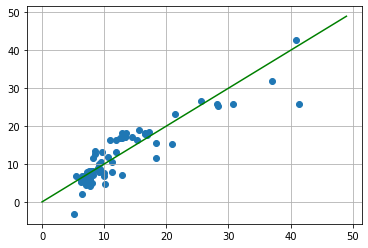

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict)**0.5))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

r2: 0.8883638366607972
MAE: 1.8307867647058824
RMSE: 2.6904514798526242


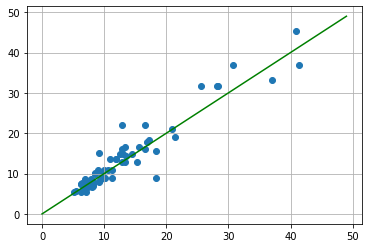

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict)**0.5))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

r2: 0.44322720601682875
MAE: 3.2663563466709973
RMSE: 6.008439824595213


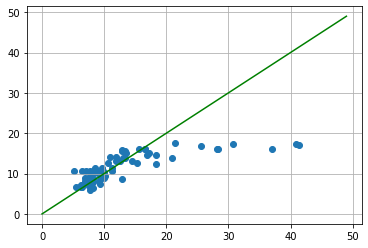

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict)**0.5))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)